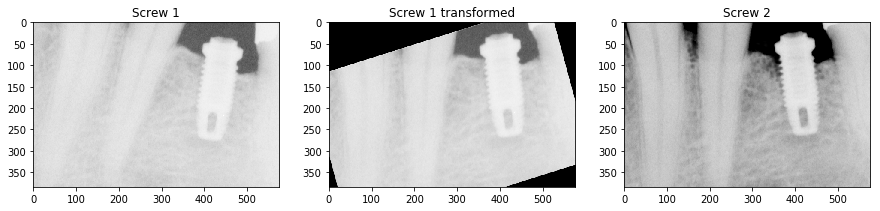

In [4]:
##Task 1: Manual Registration with OpenCV: Finding Affine Transformation

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

#img = cv2.imread('graffiti_01.png')
pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('screw-1.tif')
img2 = cv2.imread('screw-2.tif')
# YOUR CODE HERE 
#img = np.int16(img) 

rows,cols,ch = img1.shape

pts1 = np.float32([[210,15],[420,250],[450,40]])
pts2 = np.float32([[160,80],[425,240],[400,30]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img1,M,(cols,rows))

plt.subplot(131),plt.imshow(img1),plt.title('Screw 1')
plt.subplot(132),plt.imshow(dst),plt.title('Screw 1 transformed')
plt.subplot(133),plt.imshow(img2),plt.title('Screw 2')
plt.show()


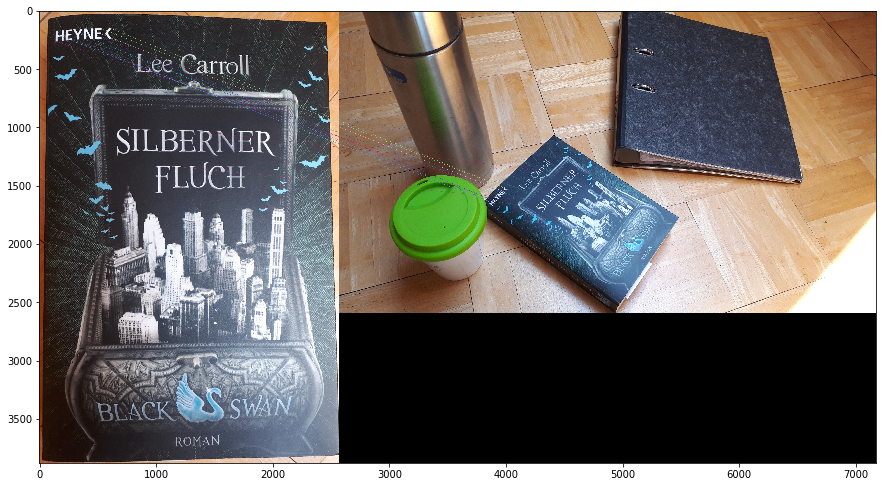

(<matplotlib.image.AxesImage at 0x7f23f020fe10>, None)

In [18]:
##Task 2: Feature-Based Registration
##https://docs.opencv.org/3.4.1/dc/dc3/tutorial_py_matcher.html
%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab


pylab.rcParams['figure.figsize'] = (15.0, 15.0)

img1 = cv2.imread('book1.jpg')# queryImage
img2 = cv2.imread('book2.jpg')# trainImage

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Initiate SIFT detector
orb = cv2.ORB_create()
kp1,des1 = orb.detectAndCompute(gray1,None)
kp2,des2 = orb.detectAndCompute(gray2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(img3),plt.show()

In [13]:
from cv2 import __version__
__version__

'3.4.4'

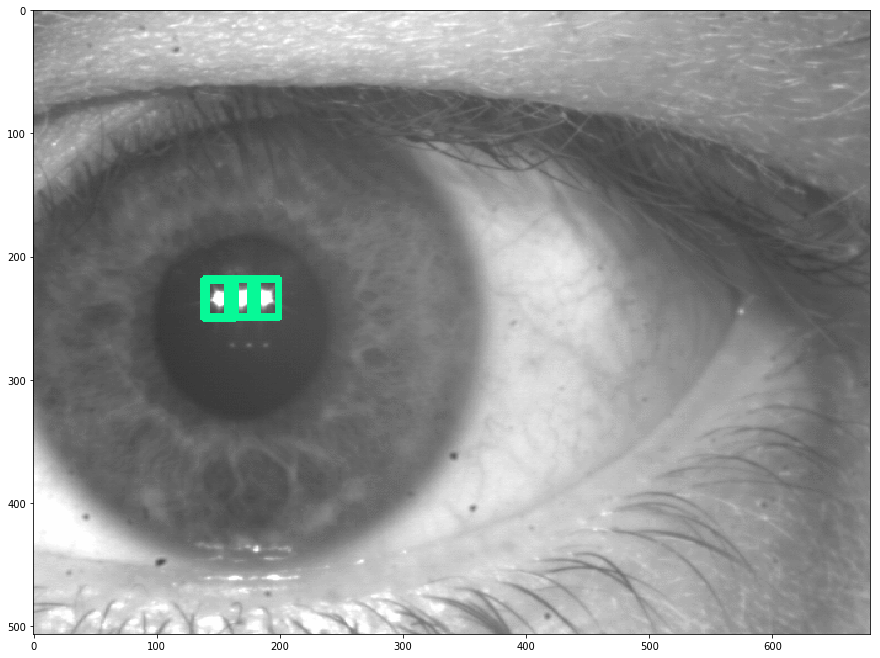

In [23]:
##Task 3: Template matching
##http://bluewhale.cc/2017-09-22/use-python-opencv-for-image-template-matching-match-template.html

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('photo-eye-1.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   

template = cv2.imread('Kernel.png',0) 
w, h = template.shape[::-1]
res = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (7,249,151), 2)

plt.imshow(img)